# Problem Statment

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Objectives of Notebook 📌¶
This notebook aims to:

- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
- Who are your target customers with whom you can start marketing strategy [easy to converse]
- How the marketing strategy works in real world

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Exploration

In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
print('The name of the columns are:', list(df.columns))

The name of the columns are: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


### Removing special characters from Column names

In [ ]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### We can observe that data is almost symetrically skewed and there must be no significant outliers

### Converting Categorical Columns to Numerical Columns

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender']= df['Gender'].map(gender_mapping)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Dropping Unnecessary Features

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### EDA

Text(0.5, 0, 'Score')

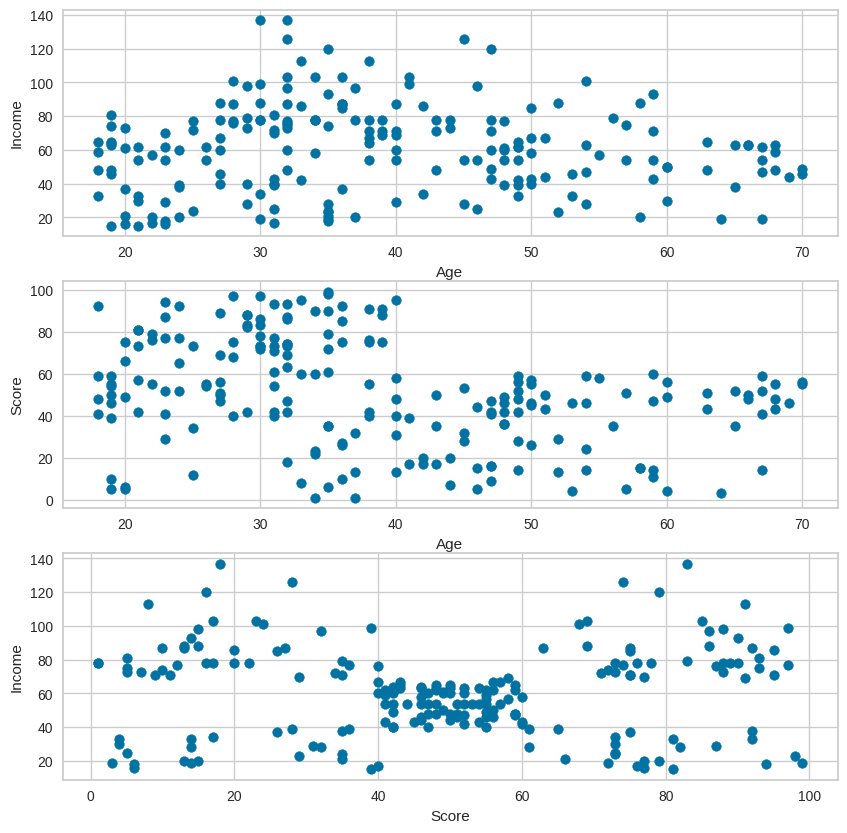

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.scatter(data=df,x='Age',y='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.subplot(3,1,2)
plt.scatter(data=df,x='Age',y='Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.subplot(3,1,3)
plt.scatter(data=df,y='Income',x='Score')
plt.ylabel('Income')
plt.xlabel('Score')

- People between age 25-30 are having maximum spending
- People between age 60-70 are not spending more
- People between age 30-40 have max income and it reduces as age increases
- People between score 40-60K having income of 40-60K

### Data Transformation

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(df)

### Identification of number of clusters

#### Elbow Method

In [ ]:
wss=[]
x=list(range(1,12))
for i in range(1,12):
  model=KMeans(n_clusters=i)
  model=model.fit(X)
  wss.append(model.inertia_)

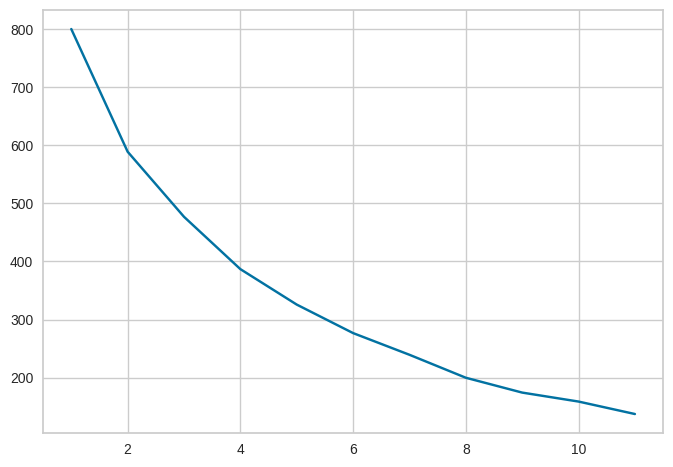

In [ ]:
plt.plot(x,wss,'-')

In [ ]:
pip install yellowbrick

#### Silhouette Method

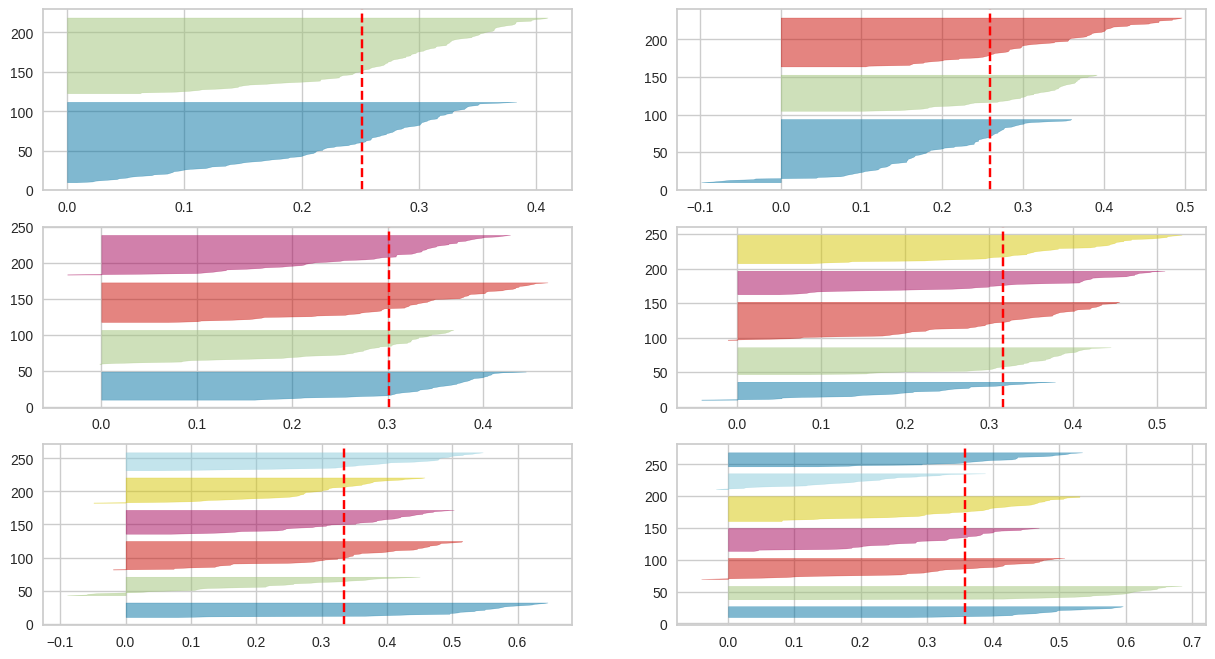

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(3,2,figsize=(15,8))
for i in range(2,8):
  model=KMeans(n_clusters=i)
  q,mod=divmod(i,2)
  visualizer=SilhouetteVisualizer(model,colors='yellowbrick',ax=ax[q-1][mod])
  visualizer.fit(X)

### Identification of Best Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
kmeans = KMeans()
param_grid = {'n_clusters': [2, 3, 4, 5, 6] }
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'n_clusters': 6}
Best Score: -105.95180220459793


### KMeans Clustering

In [ ]:
model=KMeans(n_clusters=6)
model=model.fit(X)
label=model.labels_
df['cluster']=model.labels_

Text(0, 0.5, 'Score')

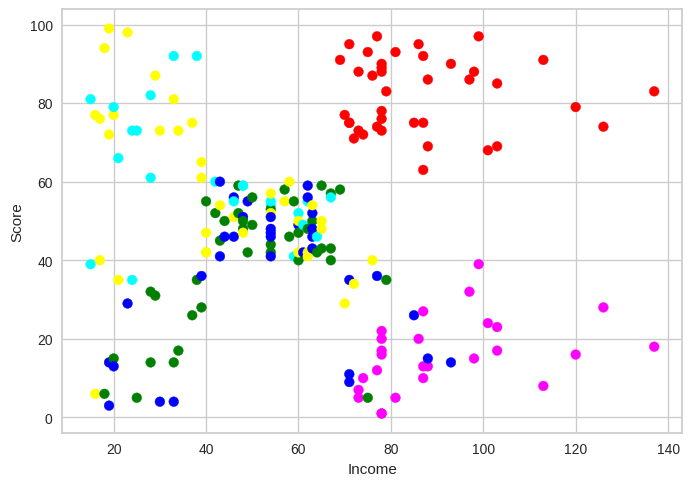

In [ ]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
color_labels = [colors[label] for label in df['cluster']]
plt.scatter(df['Income'], df['Score'], c=color_labels)
plt.xlabel('Income')
plt.ylabel('Score')

### Dropping Features for better clustering

In [ ]:
new_df=df.drop(['Gender','cluster'],axis=1)
new_df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
sc=StandardScaler()
X=sc.fit_transform(new_df)

In [ ]:
wss_new=[]
x=list(range(1,12))
for i in range(1,12):
  model=KMeans(n_clusters=i)
  model=model.fit(X)
  wss_new.append(model.inertia_)

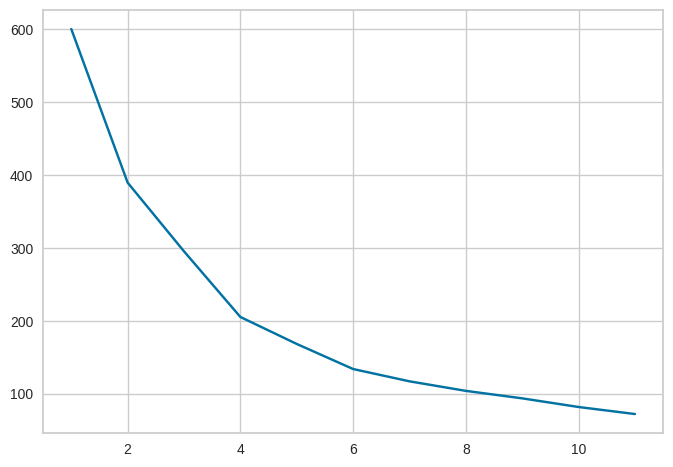

In [ ]:
plt.plot(x,wss_new,'-')

In [ ]:
wss_new

[600.0,
 389.3861889564371,
 295.2122461555488,
 205.22514747675922,
 168.24758017556837,
 133.86833362685582,
 117.01155455889811,
 103.91718304861435,
 93.65851980206435,
 81.79738635319816,
 72.16664893931741]

In [ ]:
for i in range(2,10):
  model=KMeans(n_clusters=i,random_state=1)
  model=model.fit(X)
  label=model.labels_
  print(silhouette_score(X,label,random_state=1))

0.33547192894004574
0.357793388710272
0.4039582785148566
0.41664341513732767
0.42742814991580175
0.4180766295787896
0.40778775163803344
0.4188078334648395


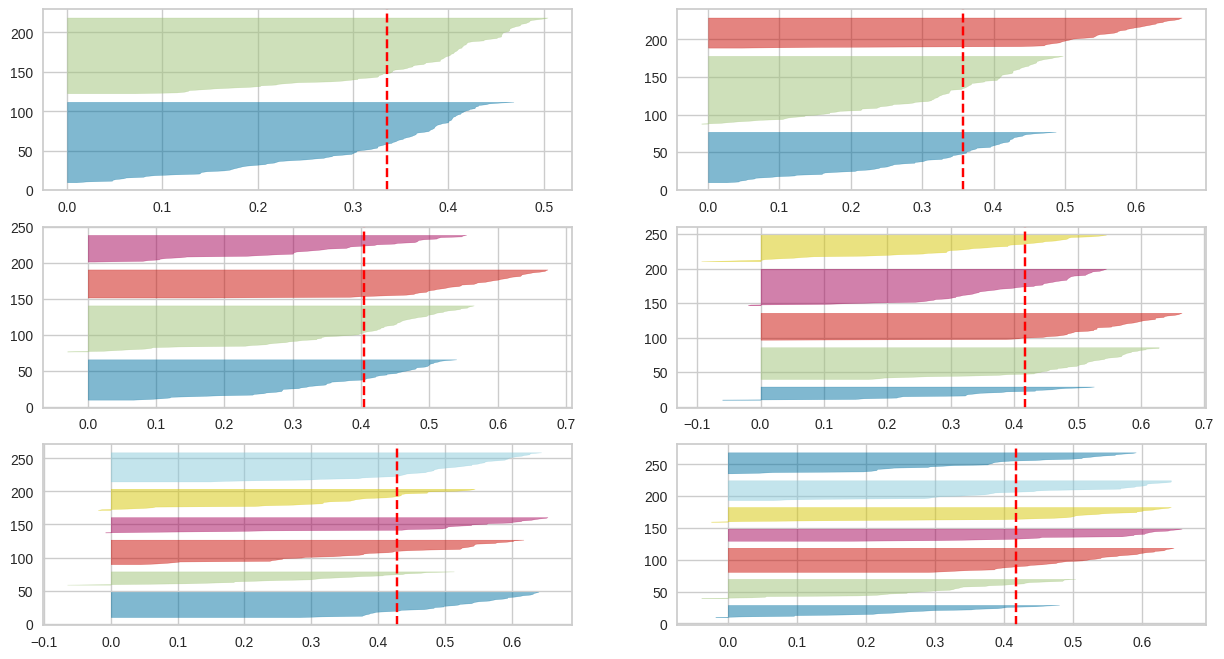

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(3,2,figsize=(15,8))
for i in range(2,8):
  model=KMeans(n_clusters=i)
  q,mod=divmod(i,2)
  visualizer=SilhouetteVisualizer(model,colors='yellowbrick',ax=ax[q-1][mod])
  visualizer.fit(X)

In [ ]:
kmeans = KMeans()
param_grid = {'n_clusters': [2, 3, 4, 5, 6] }
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_clusters': 6}
Best Score: -60.00887052431953


In [ ]:
model=KMeans(n_clusters=6,random_state=1)
model=model.fit(X)
label=model.labels_
new_df['cluster']=model.labels_

In [ ]:
new_df.head()

,Age,Income,Score,cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


Text(0, 0.5, 'Score')

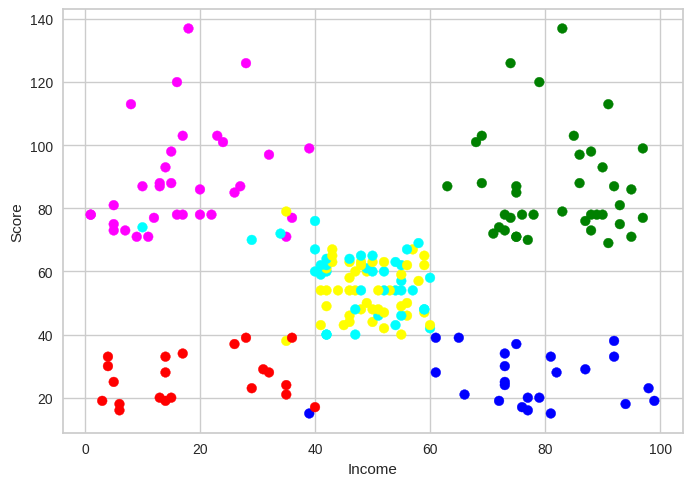

In [ ]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
color_labels = [colors[label] for label in new_df['cluster']]
plt.scatter(new_df['Score'], new_df['Income'], c=color_labels)
plt.xlabel('Income')
plt.ylabel('Score')

In [ ]:
new_df=df.drop(['Age','Gender','cluster'],axis=1)
new_df.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
sc=StandardScaler()
X=sc.fit_transform(new_df)

In [ ]:
wss_new=[]
x=list(range(1,12))
for i in range(1,12):
  model=KMeans(n_clusters=i)
  model=model.fit(X)
  wss_new.append(model.inertia_)

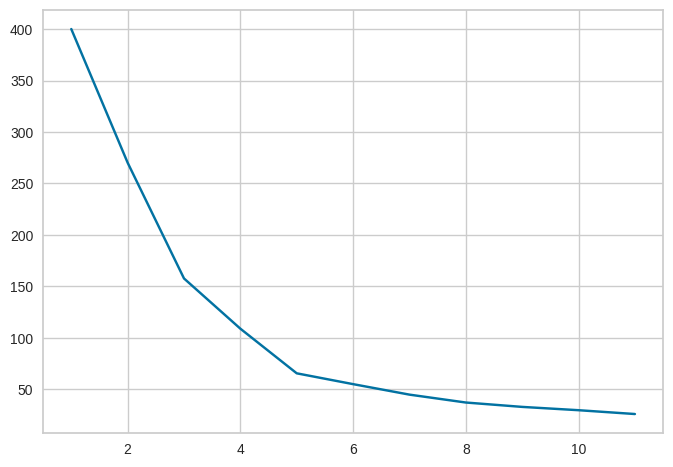

In [ ]:
plt.plot(x,wss_new,'-')

In [ ]:
for i in range(2,10):
  model=KMeans(n_clusters=i,random_state=1)
  model=model.fit(X)
  label=model.labels_
  print(silhouette_score(X,label,random_state=1))

0.28793808282017214
0.46658474419000145
0.4939069237513199
0.5546571631111091
0.5380630705007141
0.5263454490712252
0.45644093438859246
0.45528744061049026


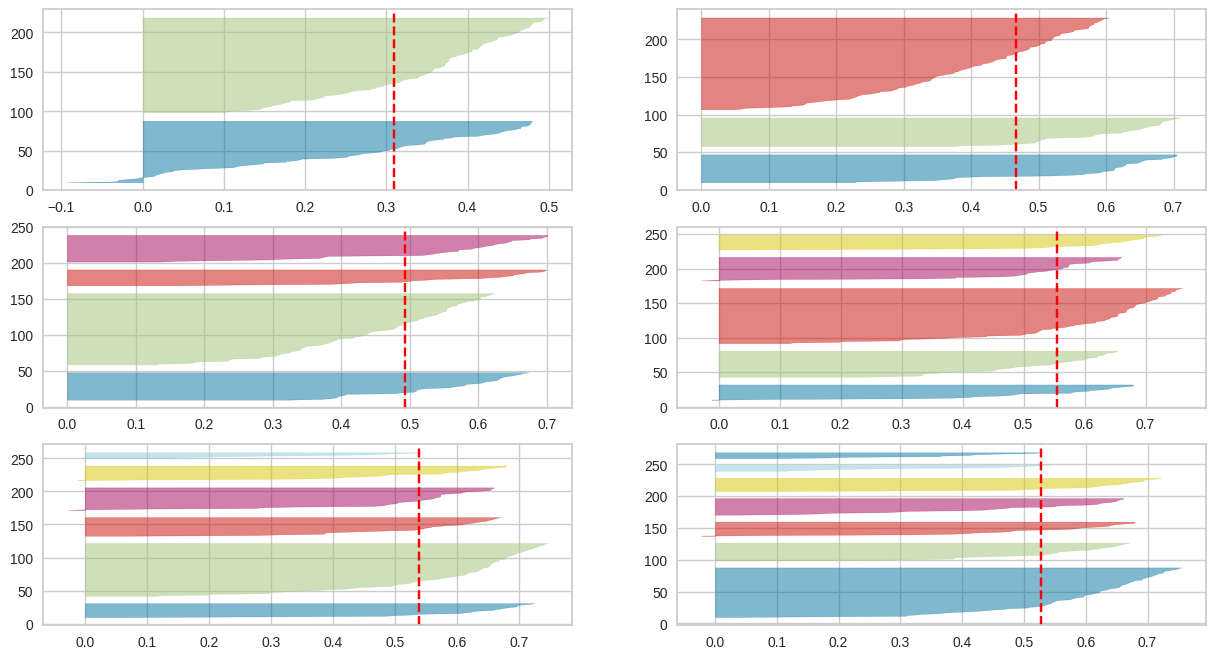

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(3,2,figsize=(15,8))
for i in range(2,8):
  model=KMeans(n_clusters=i)
  q,mod=divmod(i,2)
  visualizer=SilhouetteVisualizer(model,colors='yellowbrick',ax=ax[q-1][mod])
  visualizer.fit(X)

In [ ]:
kmeans = KMeans()
param_grid = {'n_clusters': [2, 3, 4, 5, 6] }
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_clusters': 6}
Best Score: -42.34321555927351


In [ ]:
model=KMeans(n_clusters=5,random_state=1)
model=model.fit(X)
label=model.labels_
new_df['cluster']=model.labels_
new_df.head()

,Income,Score,cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


Text(0, 0.5, 'Score')

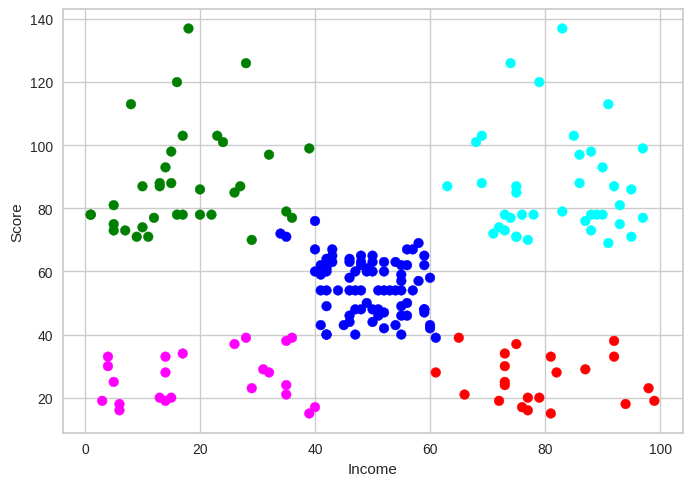

In [ ]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
color_labels = [colors[label] for label in new_df['cluster']]
plt.scatter(new_df['Score'], new_df['Income'], c=color_labels)
plt.xlabel('Income')
plt.ylabel('Score')